In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist 
import numpy as np
import matplotlib.pyplot as plt
import random

In [5]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of Y_train: {Y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_test: {Y_test.shape}")

Shape of X_train: (60000, 28, 28)
Shape of Y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of Y_test: (10000,)


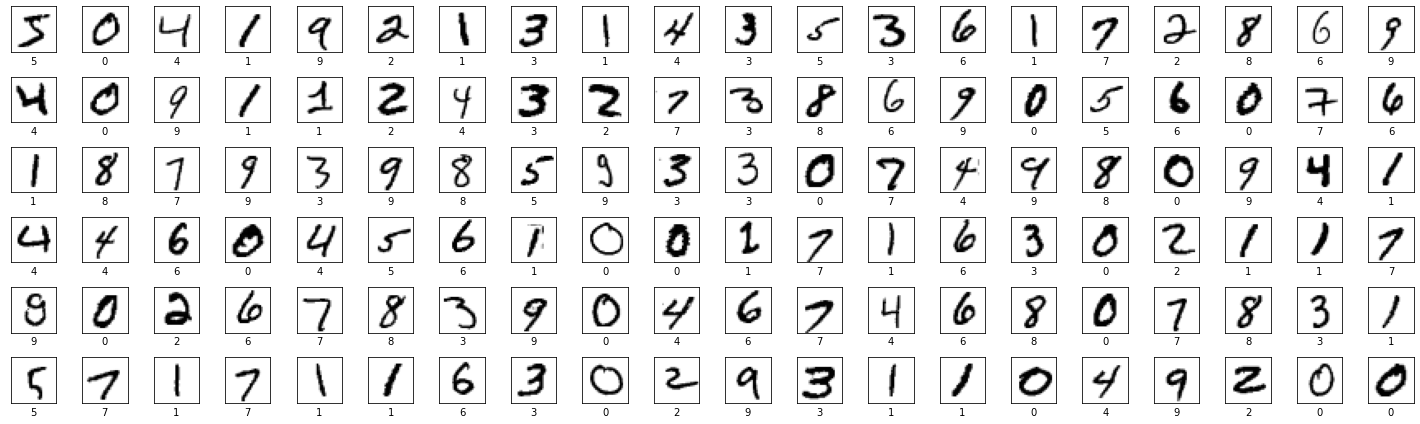

In [6]:
ROWS = 6
COLS = 20
i = 0
plt.figure(figsize=(20,6))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(X_train[i], cmap=plt.cm.gray_r)
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(Y_train[i])
        i += 1
plt.tight_layout()
plt.show()


In [7]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train, X_test = X_train / 255.0, X_test / 255.0

In [22]:
model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_16 (Dense)             (None, 10)               

In [25]:
model.compile(
	optimizer = tf.keras.optimizers.Adam(),
	loss = tf.keras.losses.sparse_categorical_crossentropy,
	metrics = ['accuracy']
)
h = model.fit(x=X_train, y=Y_train, epochs=5, validation_split = 0.3)

Epoch 1/5
1313/1313 [==============================] - 40s 30ms/step - loss: 0.0068 - accuracy: 0.9979 - val_loss: 0.0593 - val_accuracy: 0.9901
Epoch 2/5
1313/1313 [==============================] - 40s 30ms/step - loss: 0.0045 - accuracy: 0.9986 - val_loss: 0.0638 - val_accuracy: 0.9892
Epoch 3/5
1313/1313 [==============================] - 40s 30ms/step - loss: 0.0049 - accuracy: 0.9983 - val_loss: 0.0561 - val_accuracy: 0.9901
Epoch 4/5
1313/1313 [==============================] - 40s 30ms/step - loss: 0.0028 - accuracy: 0.9992 - val_loss: 0.0642 - val_accuracy: 0.9898
Epoch 5/5
1313/1313 [==============================] - 40s 30ms/step - loss: 0.0060 - accuracy: 0.9979 - val_loss: 0.0662 - val_accuracy: 0.9899


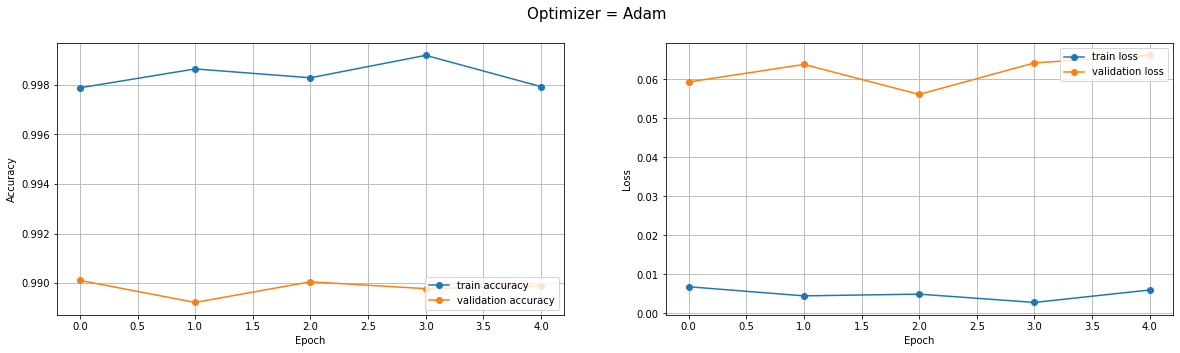

In [26]:
plt.figure(figsize=(20,5))
plt.suptitle('Optimizer = Adam', fontsize = 15)
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label = 'train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label = 'train loss')
plt.plot(h.history['val_loss'], 'o-', label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [27]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'\nTest accuracy: {test_accuracy}')

313/313 [==============================] - 3s 8ms/step - loss: 0.0472 - accuracy: 0.9908

Test accuracy: 0.9908000230789185


In [28]:
model.compile(
	optimizer = tf.keras.optimizers.SGD(),
	loss = tf.keras.losses.sparse_categorical_crossentropy,
	metrics = ['accuracy']
)

h = model.fit(x=X_train, y=Y_train, epochs=5, validation_split = 0.3)

Epoch 1/5
1313/1313 [==============================] - 39s 30ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.0559 - val_accuracy: 0.9912
Epoch 2/5
1313/1313 [==============================] - 39s 30ms/step - loss: 7.6704e-04 - accuracy: 0.9998 - val_loss: 0.0549 - val_accuracy: 0.9916
Epoch 3/5
1313/1313 [==============================] - 40s 30ms/step - loss: 4.5139e-04 - accuracy: 0.9999 - val_loss: 0.0556 - val_accuracy: 0.9914
Epoch 4/5
1313/1313 [==============================] - 40s 30ms/step - loss: 3.1668e-04 - accuracy: 1.0000 - val_loss: 0.0550 - val_accuracy: 0.9914
Epoch 5/5
1313/1313 [==============================] - 39s 30ms/step - loss: 2.4470e-04 - accuracy: 1.0000 - val_loss: 0.0550 - val_accuracy: 0.9914


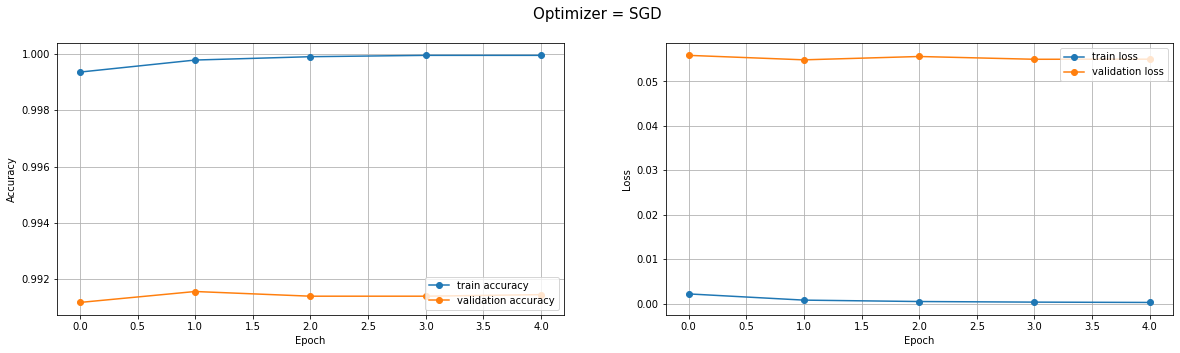

In [29]:
plt.figure(figsize=(20,5))
plt.suptitle('Optimizer = SGD', fontsize = 15)
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label = 'train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label = 'train loss')
plt.plot(h.history['val_loss'], 'o-', label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [30]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'\nTest accuracy: {test_accuracy}')

313/313 [==============================] - 3s 8ms/step - loss: 0.0404 - accuracy: 0.9935

Test accuracy: 0.9934999942779541


In [31]:
model.compile(
	optimizer = tf.keras.optimizers.RMSprop(),
	loss = tf.keras.losses.sparse_categorical_crossentropy,
	metrics = ['accuracy']
)

h = model.fit(x=X_train, y=Y_train, epochs=5, validation_split = 0.3)

Epoch 1/5
1313/1313 [==============================] - 42s 32ms/step - loss: 6.2264e-04 - accuracy: 0.9997 - val_loss: 0.0824 - val_accuracy: 0.9918
Epoch 2/5
1313/1313 [==============================] - 41s 31ms/step - loss: 3.1614e-04 - accuracy: 0.9999 - val_loss: 0.0971 - val_accuracy: 0.9916
Epoch 3/5
1313/1313 [==============================] - 41s 31ms/step - loss: 1.0528e-04 - accuracy: 1.0000 - val_loss: 0.1007 - val_accuracy: 0.9921
Epoch 4/5
1313/1313 [==============================] - 41s 31ms/step - loss: 1.4576e-05 - accuracy: 1.0000 - val_loss: 0.1174 - val_accuracy: 0.9916
Epoch 5/5
1313/1313 [==============================] - 41s 31ms/step - loss: 2.8840e-05 - accuracy: 1.0000 - val_loss: 0.1123 - val_accuracy: 0.9922


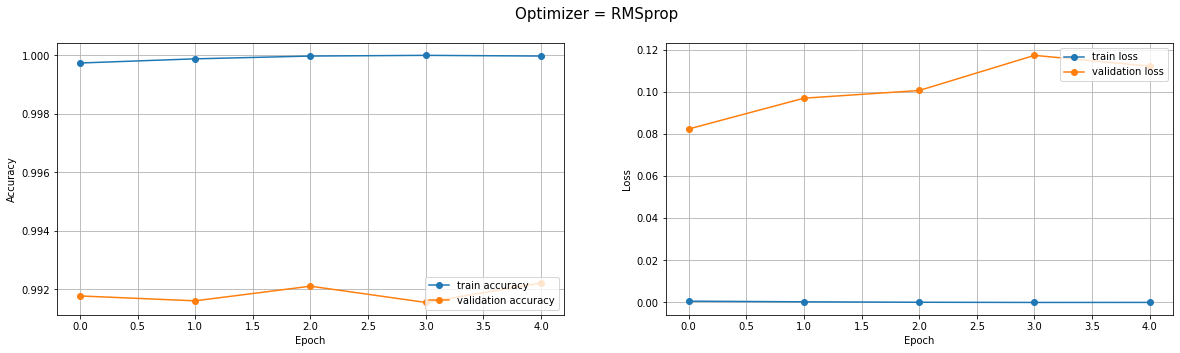

In [32]:
plt.figure(figsize=(20,5))
plt.suptitle('Optimizer = RMSprop', fontsize = 15)
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label = 'train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label = 'train loss')
plt.plot(h.history['val_loss'], 'o-', label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [33]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'\nTest accuracy: {test_accuracy}')

313/313 [==============================] - 3s 8ms/step - loss: 0.0789 - accuracy: 0.9936

Test accuracy: 0.9936000108718872
